## *Submitted by* - `Sunita Pradhan`

# Question 8 -

### Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -

● Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.

● Get all the episode names, whose average rating is more than 8 for every season

● Get all the episode names that aired before May 2019

● Get the episode name from each season with the highest and lowest rating

● Get the summary for the most popular ( ratings ) episode in every season

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import requests
import warnings
warnings.filterwarnings("ignore")

# Fetch JSON data from URL
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"
response = requests.get(url)
data = response.json()

x=data['_embedded']['episodes']

def extract_dictionary(list_of_dicts, key, value):
    for dictionary in list_of_dicts:
        if key in dictionary and dictionary[key] == value:
            return dictionary
    return None

extracted_dict = extract_dictionary(x, "id", 2326658)
# print(extracted_dict)

import json

# Convert dictionary to JSON
json_data = json.dumps(extracted_dict)

print(json_data)

{"id": 2326658, "url": "https://www.tvmaze.com/episodes/2326658/westworld-4x05-zhuangzi", "name": "Zhuangzi", "season": 4, "number": 5, "type": "regular", "airdate": "2022-07-24", "airtime": "21:00", "airstamp": "2022-07-25T01:00:00+00:00", "runtime": 60, "rating": {"average": 7.8}, "image": {"medium": "https://static.tvmaze.com/uploads/images/medium_landscape/416/1042460.jpg", "original": "https://static.tvmaze.com/uploads/images/original_untouched/416/1042460.jpg"}, "summary": "<p>God is bored.</p>", "_links": {"self": {"href": "https://api.tvmaze.com/episodes/2326658"}, "show": {"href": "https://api.tvmaze.com/shows/1371"}}}


In [3]:
df=pd.DataFrame(x)

##### A. Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.

In [6]:
def rat(val):
    return val['average']

In [7]:
df['rating_value']=df['rating'].apply(rat)

In [8]:
rating = pd.DataFrame(df.groupby(['season'])['rating_value'].sum())

In [9]:
rating

,rating_value
season,
1,80.9
2,80.0
3,62.2
4,60.3


<Axes: xlabel='season'>

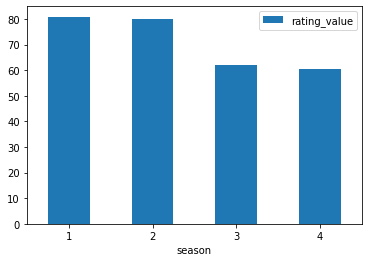

In [10]:
rating.plot(kind='bar',rot=0)

##### B. Get all the episode names, whose average rating is more than 8 for every season

In [11]:
##Applying condition to get episode names
ep_name = df[df['rating_value']>8]['name'].to_list()

In [13]:
##all the episode names, whose average rating is more than 8 for every season
ep_name

["Trompe L'Oeil",
 'The Well-Tempered Clavier',
 'The Bicameral Mind',
 'Kiksuya',
 'Vanishing Point',
 'The Passenger']

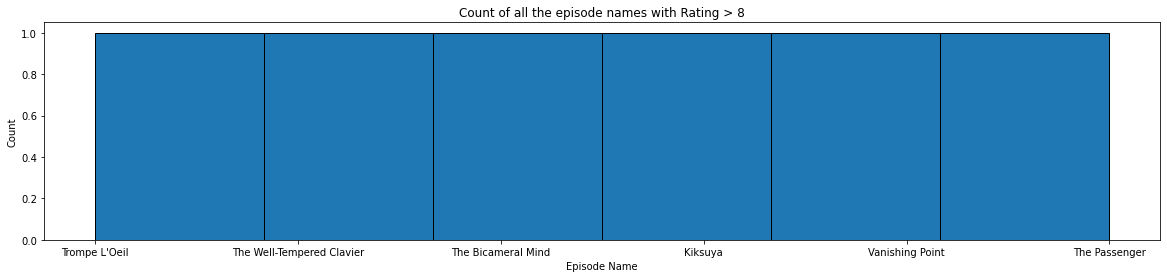

In [22]:
# Plot the count of TV shows
plt.figure(figsize=(20, 4))
plt.hist(ep_name, bins=len(ep_name), edgecolor='black')
plt.xlabel('Episode Name')
plt.ylabel('Count')
plt.title('Count of all the episode names with Rating > 8')
plt.show()

##### C.  Get all the episode names that aired before May 2019


In [18]:
##Converting the airdate column to datatime datatype
df['airdate'] = pd.to_datetime(df['airdate'])

# Extract year, month, and day
df['year'] = df['airdate'].dt.year
df['month'] = df['airdate'].dt.month
df['day'] = df['airdate'].dt.day

In [19]:
#Applying the condition
filtered_ep_name = df[(df['year'] > 2019) & (df['month'] > 5)]['name'].to_list()

In [20]:
#All the episode names that aired before May 2019
filtered_ep_name

['The Auguries',
 'Well Enough Alone',
 'Années Folles',
 'Generation Loss',
 'Zhuangzi',
 'Fidelity',
 'Metanoia',
 'Que Será, Será']

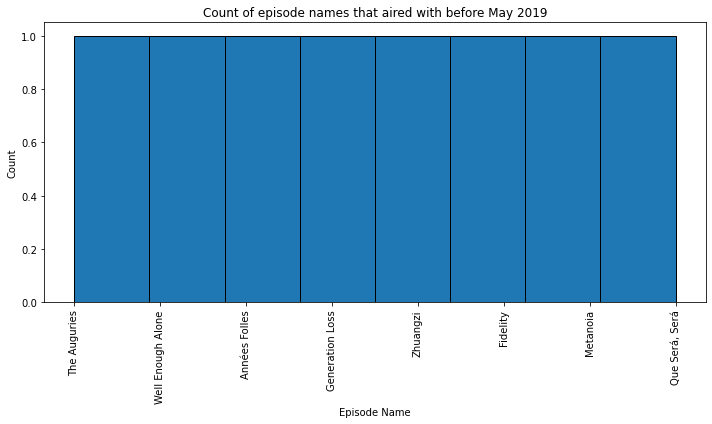

In [25]:
# Plot the count of TV shows
plt.figure(figsize=(10, 6))
plt.hist(filtered_ep_name, bins=len(filtered_ep_name), edgecolor='black')
plt.xlabel('Episode Name')
plt.ylabel('Count')
plt.title('Count of episode names that aired with before May 2019')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### D. ● Get the episode name from each season with the highest and lowest rating

In [26]:
# Find episode names with highest rating for each season
highest_rating = df.groupby('season')['rating_value'].idxmax()
fil_ep_name1 = df.loc[highest_rating, ['name', 'season', 'rating_value']]

# Find episode names with lowest rating for each season
lowest_rating = df.groupby('season')['rating_value'].idxmin()
fil_ep_name2 = df.loc[lowest_rating, ['name', 'season', 'rating_value']]

# results
print("Episode names with the highest rating:")
print(fil_ep_name1)

print("\nEpisode names with the lowest rating:")
print(fil_ep_name2)    

Episode names with the highest rating:
                  name  season  rating_value
9   The Bicameral Mind       1           8.7
17             Kiksuya       2           8.7
20        Parce Domine       3           8.0
32            Zhuangzi       4           7.8

Episode names with the lowest rating:
            name  season  rating_value
2      The Stray       1           7.6
14  Akane No Mai       2           7.6
25   Decoherence       3           7.5
28  The Auguries       4           7.1


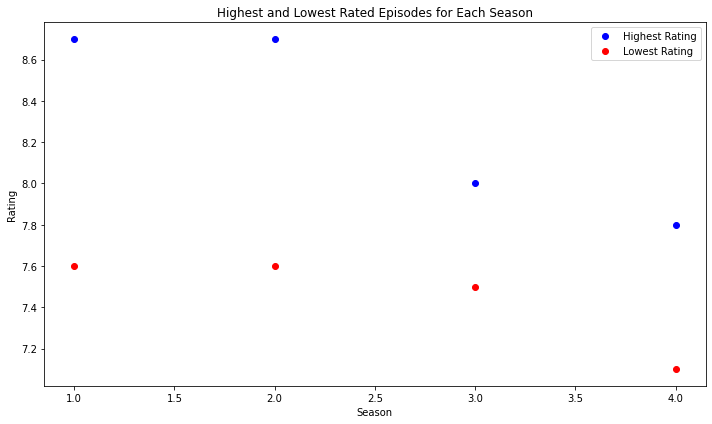

In [27]:
# Plot for the highest and lowest rated episodes for each season
plt.figure(figsize=(10, 6))
plt.plot(fil_ep_name1['season'], fil_ep_name1['rating_value'], 'bo', label='Highest Rating')
plt.plot(fil_ep_name2['season'], fil_ep_name2['rating_value'], 'ro', label='Lowest Rating')
plt.xlabel('Season')
plt.ylabel('Rating')
plt.title('Highest and Lowest Rated Episodes for Each Season')
plt.legend()
plt.tight_layout()
plt.show()

##### E. Get the summary for the most popular ( ratings ) episode in every season

In [35]:
# Find summary of most popular episode for each season
highest_rating = df.groupby('season')['rating_value'].idxmax()
summ = df.loc[highest_rating, ['summary', 'season', 'rating_value']]

# results
print("Episode names with the highest rating:")
print(summ)

Episode names with the highest rating:
                                              summary  season  rating_value
9   <p>Delores finds out the truth about William's...       1           8.7
17  <p>Another of Westworld's Host revolutionaries...       2           8.7
20  <p>If you're stuck in a loop, try walking in a...       3           8.0
32                               <p>God is bored.</p>       4           7.8


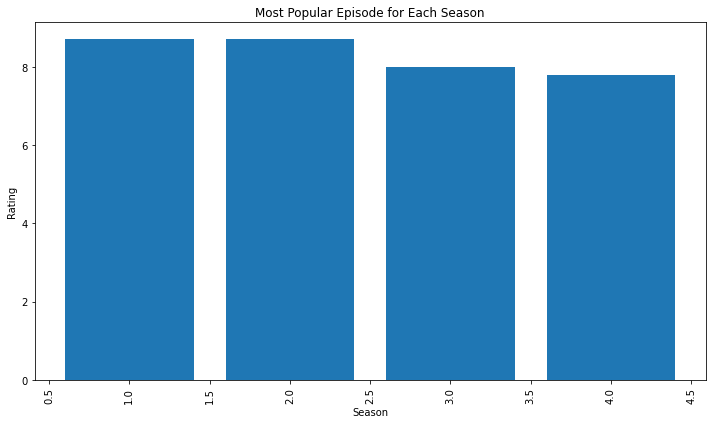

In [36]:
# Plot the distribution of the highest-rated episodes across seasons
plt.figure(figsize=(10, 6))
plt.bar(summ['season'], summ['rating_value'])
plt.xlabel('Season')
plt.ylabel('Rating')
plt.title('Most Popular Episode for Each Season')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Thank you😊